In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

In [28]:
data_url = 'https://raw.githubusercontent.com/Customer-Churn-Prediction/Project-Machine-Learning/master/Churning.csv'
data = pd.read_csv(data_url)
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


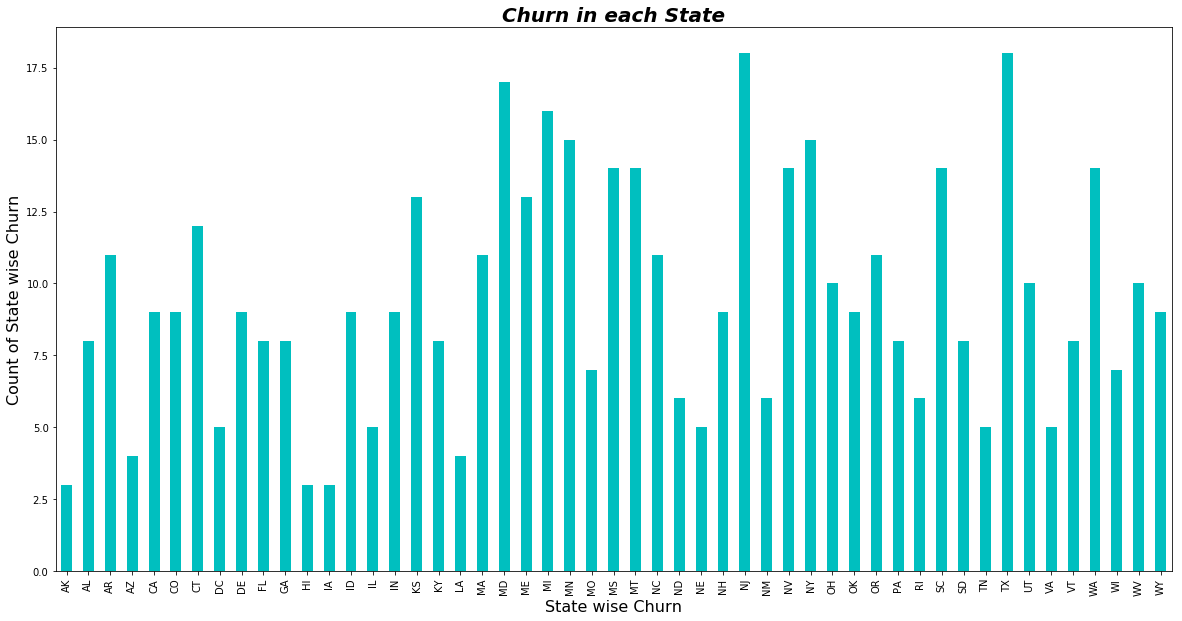

In [29]:
State_Churn=data.query('Churn==1').groupby(['State']).size()
State_Churn.plot(kind='bar',color='c', figsize=(20,10))
plt.title('Churn in each State', fontsize=20,fontweight='bold',style='italic')
plt.xlabel('State wise Churn', fontsize=16)
plt.ylabel('Count of State wise Churn', fontsize=16)
plt.show()

In [30]:
 # dropping unwanted columns like 'Phone Numbers', 'State Names', 'Area Code' 
# to increase accuracy
target = np.array(data.Churn)
data = data.drop(['Churn','State','Area Code','Phone'], axis = 1)
data.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In [31]:
# Performing K Fold cross-validation 
# Although test_train split is the more generic method of splitting
# the data into train and test sets, it posesess a drawback in the form of data
# loss,i.e, a data once used for test set cannot be utilised for train set.
# K-Fold Cross Validation removes this drawback and splits the data without
# any loss of data
data_matrix=data.as_matrix()
kf = KFold(n_splits=4)
kf.get_n_splits(data)

for train_index, test_index in kf.split(data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    train_x, test_x = data_matrix[train_index], data_matrix[test_index]
    train_y, test_y = target[train_index], target[test_index]
    #print(len(test_x))
    #print(len(train_x))

In [32]:
# printing the result obtained from the K Fold Cross-Validation
print(len(test_y))
print(len(train_y))

833
2500


In [33]:
# Storing all the column names as an array called features
features=data.columns[:18]
features

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Int'l Plan', 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge'],
      dtype='object')

In [34]:
#creating a random forrest classifier,by convention clf means 'classifier'
clf = RandomForestClassifier(n_jobs=2,random_state=0)
# train the classifier to take the training features and learning how they are related to the features 
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [35]:
#applying the classifier we trained to the test data 
preds = clf.predict(test_x)

In [36]:
#to check how much confident is the classifier of the test data
proba = clf.predict_proba(test_x)
proba

array([[ 0.9,  0.1],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       ..., 
       [ 0.9,  0.1],
       [ 0.8,  0.2],
       [ 0.7,  0.3]])

In [130]:
#creating the confusion matrix and displaying it as a dataframe
confusion_rfc = pd.crosstab(np.array(test_y),preds, rownames=['Actual Churn'], colnames=['Predicted Churn'])
confusion_rfc

Predicted Churn,0,1
Actual Churn,,
0,696,1
1,48,88


In [38]:
#converting the above dataframe into a matrix
matrix_rfc =confusion_rfc.as_matrix()
matrix_rfc

array([[696,   1],
       [ 48,  88]], dtype=int64)

In [47]:
#viewing the importance of each feature and viewing a list of the features and their importance score
imp_rfc = list(zip(clf.feature_importances_,features))

In [48]:
#showing the feature importances as a dataframe
feature_importances=pd.DataFrame(columns=['importance','labels'], data=imp_rfc)
feature_importances

,importance,labels
0,0.028607,Account Length
1,0.024239,VMail Message
2,0.097531,Day Mins
3,0.062818,Eve Mins
4,0.046326,Night Mins
5,0.049395,Intl Mins
6,0.127275,CustServ Calls
7,0.058677,Int'l Plan
8,0.033345,VMail Plan
9,0.028743,Day Calls


,importance,labels
10,0.164849,Day Charge
6,0.127275,CustServ Calls
2,0.097531,Day Mins
12,0.076910,Eve Charge
15,0.063806,Intl Calls


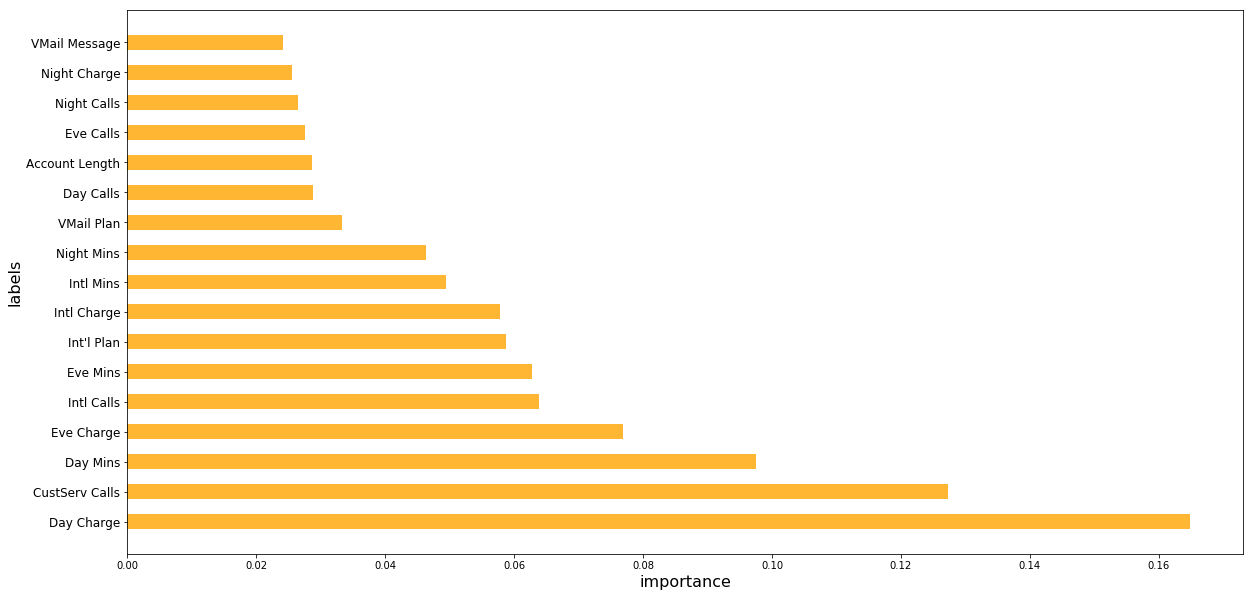

In [83]:
#plotting a graph on the basis of importance of each feature
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
feature_importances.sort_values("importance", inplace=True, ascending=False)
display(feature_importances.head())

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , feature_importances["importance"], bar_width, alpha=0.8, color='orange', label='Main')
plt.yticks(index, feature_importances["labels"], fontsize = 12)
plt.xlabel('importance', fontsize = 16)
plt.ylabel('labels', fontsize = 16)
plt.show()

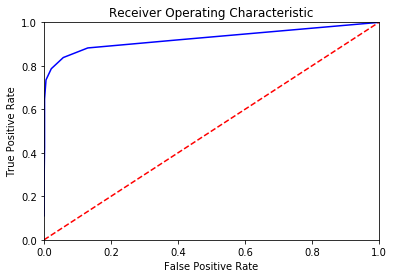

In [85]:
#plotting the ROC curve(Reciever Operating Characterestic) for Random Forest Classifier between fpr and tpr
#fpr:false positive rate
#tpr:true positive rate
fpr, tpr, threshold = roc_curve(test_y,proba[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [129]:
#calculating accuracy of RandomForestClassifier
from sklearn.metrics import accuracy_score
acc_rfc = accuracy_score(test_y, preds)
print('Accuracy of Random Forest Classifier:', acc_rfc)

Accuracy of Random Forest Classifier: 0.941176470588


In [100]:
# importing GaussianNB and comparing it with the accuracy of random forest classifier
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [100]:
#applying the classifier we trained to the test data 
pred = gnb.fit(train_x, train_y).predict(test_x)

In [100]:
#to check how much confident is the classifier of the test data
proba = gnb.predict_proba(test_x)

In [131]:
#creating the confusion matrix for GaussianNB and displaying it as a dataframe
confusion_gnb = pd.crosstab(test_y, pred, rownames=['Actual Churn'], colnames=['Predicted Churn'])
confusion_gnb

Predicted Churn,0,1
Actual Churn,,
0,682,15
1,96,40


In [132]:
#converting the above dataframe into a matrix
matrix_gnb = confusion_gnb.as_matrix()
matrix_gnb

array([[682,  15],
       [ 96,  40]], dtype=int64)

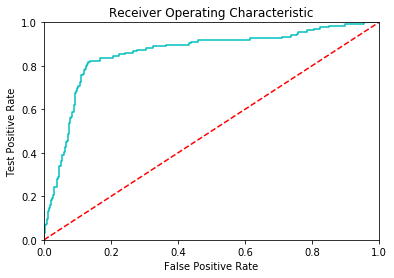

In [103]:
#plotting the ROC curve(Reciever Operating Characterestic) for GaussianNB between fpr and tpr
#fpr:false positive rate
#tpr:true positive rate
fpr, tpr, threshold = roc_curve(test_y, proba[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'c')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('Test Positive Rate')
plt.show()

In [134]:
#calculating accuracy of GaussianNB
acc_gnb = accuracy_score(test_y, preds)
print('Accuracy of Gaussian Naive Bayes:', acc_gnb)

Accuracy of Gaussian Naive Bayes: 0.941176470588


In [128]:
#predictions and probability for KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', n_jobs=-1)
knn.fit(train_x, train_y)

In [128]:
#applying the classifier we trained to the test data
pred= knn.predict(test_x)

In [128]:
#to check how much confident is the classifier of the test data
proba=knn.predict_proba(test_x)

In [128]:
#creating the confusion matrix for GaussianNB and displaying it as a dataframe
d= pd.DataFrame(confusion_matrix(test_y, pred),columns=["Predicted False","Predicted True"],
             index=["Actual False","Actual True"])

In [128]:
#converting the above dataframe into a matrix
cnf =d.as_matrix()
scores = cross_val_score(knn, train_x, train_y, cv=10, scoring='accuracy')

array([[682,  15],
       [ 96,  40]], dtype=int64)

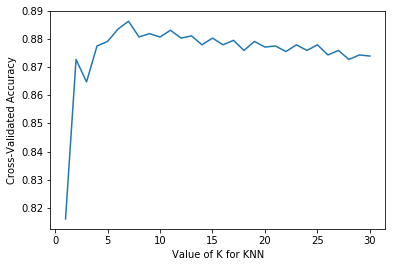

In [127]:
#plotting graph for KNN classifier
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_x, train_y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

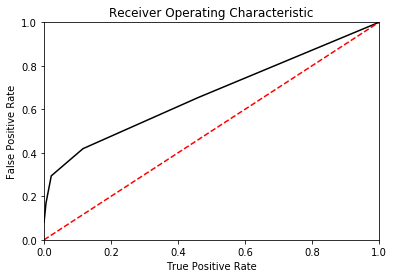

In [122]:
#plotting the ROC curve(Reciever Operating Characterestic) for KNN Classifier between fpr and tpr
#fpr:false positive rate
#tpr:true positive rate
fpr, tpr, threshold = roc_curve(test_y, proba[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'k')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()

In [137]:
#calculating accuracy for KNN classifier
acc_knn = accuracy_score(test_y, pred)
print('Accuracy of KNN classifier:', acc_knn)

Accuracy of KNN classifier: 0.866746698679
